# Lab 1: EDA

## Dataset Overview

Today's lab utilizes a subset of the **Carrier On-Time Performance Dataset** ([Kaggle link](https://www.kaggle.com/datasets/mexwell/carrier-on-time-performance-dataset?resource=download)), which originally contains data on 2 million domestic US flights. For this session, we focus specifically on flight data from **2019** to perform **Exploratory Data Analysis (EDA)**.

The link for the data today: [download](https://nuwildcat-my.sharepoint.com/:x:/g/personal/dxk9547_ads_northwestern_edu/IQAfJBZ99jdcTKg2iqSrD6QMAeyclVF_jJ0YE_PJy-eMtnM?e=1HvTQ8)

## Objectives

The preprocessing and analysis tasks for today's lab include:

- **Renaming columns** to improve readability.
- **Generating descriptive statistics**, such as mean, standard deviation, and percentiles.
- **Calculating missing values**, expressed as a percentage for each column.
- **Visualizing data** using:
  - **Boxplots** for continuous variables.
  - **Bar charts** for discrete variables.
- **Filtering data** to exclude outliers or irrelevant entries.
- **Creating new features** through transformations, such as:
  - Logarithmic transformation.
  - Normalization and standardization.
- **Computing additional insights**, including:
  - Total flight counts.
  - Average flight speeds.
- **Plotting relationships**, such as arrival delays versus departure times.
- **Comparing subsets of data**, like flights from specific airports (e.g., SFO vs. LGA).

In [24]:
# %pip install seaborn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
## Change the file location to your saved location
FILE_LOCATION = '/Users/kcui2/de300/airline_2019(in).csv'

In [26]:
use_cols = [
    # 29 columns out of 109
    "Year", "Month", "DayofMonth", "DayOfWeek", "DepTime", "CRSDepTime",
    "ArrTime", "CRSArrTime", "Reporting_Airline","Flight_Number_Reporting_Airline", 
    "Tail_Number", "ActualElapsedTime", "CRSElapsedTime", "AirTime", "ArrDelay", "DepDelay", "Origin", "Dest",
    "Distance", "TaxiIn", "TaxiOut", "Cancelled",
    "CancellationCode", "Diverted", "CarrierDelay", "WeatherDelay", "NASDelay", "SecurityDelay",
    "LateAircraftDelay"
]

In [27]:
df_2019 = pd.read_csv(FILE_LOCATION, usecols = use_cols)

In [28]:
df_2019.head(10)

,Year,Month,DayofMonth,DayOfWeek,Reporting_Airline,Tail_Number,Flight_Number_Reporting_Airline,Origin,Dest,CRSDepTime,...,Diverted,CRSElapsedTime,ActualElapsedTime,AirTime,Distance,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2019,6,11,2,9E,N927XJ,3459,ATL,CAE,1950,...,0,67.0,60.0,35.0,192,0.0,0.0,0.0,0.0,214.0
1,2019,9,2,1,YX,N203JQ,6104,JAX,BOS,1204,...,0,168.0,169.0,149.0,1010,NaN,NaN,NaN,NaN,NaN
2,2019,3,27,3,OH,N582NN,5125,CHO,CLT,1605,...,0,83.0,77.0,52.0,245,NaN,NaN,NaN,NaN,NaN
3,2019,2,13,3,WN,N491WN,172,MSY,FLL,1055,...,0,115.0,109.0,97.0,674,NaN,NaN,NaN,NaN,NaN
4,2019,5,8,3,DL,N922DZ,1416,JAX,ATL,1714,...,0,81.0,65.0,44.0,270,NaN,NaN,NaN,NaN,NaN
5,2019,11,10,7,OO,N909EV,5050,DEN,PUB,1541,...,0,49.0,43.0,26.0,109,NaN,NaN,NaN,NaN,NaN
6,2019,4,23,2,DL,N342NB,2583,MSP,JFK,1000,...,0,176.0,149.0,129.0,1029,NaN,NaN,NaN,NaN,NaN
7,2019,12,30,1,AA,N179UW,1320,BOS,CLT,1447,...,0,154.0,167.0,132.0,728,NaN,NaN,NaN,NaN,NaN
8,2019,9,6,5,OO,N243SY,3977,SEA,SLC,2104,...,0,125.0,116.0,89.0,689,NaN,NaN,NaN,NaN,NaN
9,2019,11,25,1,NK,N915NK,903,ORD,DFW,2050,...,0,156.0,147.0,119.0,801,NaN,NaN,NaN,NaN,NaN


In [29]:
print(f'Number of observations in 2019: {df_2019.shape[0]}')

Number of observations in 2019: 76616


## Read in the datasets and extract a subset for each

In [30]:
# rename a a few columns
df_2019.rename(
    columns={
        "Reporting_Airline":"UniqueCarrier", 
        "Flight_Number_Reporting_Airline":"FlightNum", 
        "Tail_Number":"TailNum"
    }, 
    inplace=True
)

# df.rename() method: Original_Name:NewName
# - Snake Case Convention: use underscores (_) to separate words
# - Camel Case/ Pascal Case: capitalize the first letter of each word

In [31]:
# randomly sample 20k observations and perform analysis on this subset
df_2019 = df_2019.sample(n=20000,random_state=1)

## EDA
### 1. Quick Profile of Dataset

In [32]:
# first 5 rows of 2019 data
df_2019.head(5)

,Year,Month,DayofMonth,DayOfWeek,UniqueCarrier,TailNum,FlightNum,Origin,Dest,CRSDepTime,...,Diverted,CRSElapsedTime,ActualElapsedTime,AirTime,Distance,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
63489,2019,11,3,7,MQ,N612AE,3525,BMI,ORD,1002,...,0,60.0,49.0,32.0,116,4.0,0.0,0.0,0.0,13.0
45712,2019,5,21,2,WN,N8310C,1143,BWI,ISP,1805,...,0,65.0,62.0,50.0,220,0.0,0.0,0.0,0.0,15.0
23037,2019,10,6,7,OO,N196SY,3304,SJC,TUS,1730,...,0,125.0,122.0,101.0,722,0.0,0.0,0.0,0.0,22.0
53159,2019,10,24,4,MQ,N238NN,3551,MDT,ORD,640,...,0,132.0,124.0,99.0,594,NaN,NaN,NaN,NaN,NaN
15357,2019,10,14,1,B6,N804JB,567,ATL,FLL,1615,...,0,114.0,96.0,79.0,581,NaN,NaN,NaN,NaN,NaN


In [33]:
def get_info(pd_frame):
    # generate descriptive statistics (like count, mean, std, min, etc.) for numeric columns
    res = pd_frame.describe().transpose()
    # calculate the missing percentage for each variable
    res['missing_percent'] = [(pd_frame.shape[0] - res.loc[ind, 'count'])/pd_frame.shape[0] for ind in res.index]
    # 
    res['unique_val'] = [len(pd_frame.loc[:,ind].value_counts()) for ind in res.index]
    res['var_type'] = ['Continuous' if res.loc[ind, 'unique_val'] >=100 else 'Categorical' for ind in res.index]
    return res

In [34]:
df_2019_info = get_info(df_2019)
df_2019_info

,count,mean,std,min,25%,50%,75%,max,missing_percent,unique_val,var_type
Year,20000.0,2019.000000,0.000000,2019.0,2019.0,2019.0,2019.00,2019.0,0.00000,1,Categorical
Month,20000.0,6.605000,3.423224,1.0,4.0,7.0,10.00,12.0,0.00000,12,Categorical
DayofMonth,20000.0,15.738550,8.755634,1.0,8.0,16.0,23.00,31.0,0.00000,31,Categorical
DayOfWeek,20000.0,3.918800,2.002850,1.0,2.0,4.0,6.00,7.0,0.00000,7,Categorical
FlightNum,20000.0,2565.617600,1798.927455,1.0,1039.0,2169.0,3923.25,7435.0,0.00000,5678,Continuous
CRSDepTime,20000.0,1333.964250,493.976810,5.0,915.0,1325.0,1740.00,2359.0,0.00000,1150,Continuous
DepTime,19664.0,1337.476302,509.307628,1.0,915.0,1330.0,1750.00,2400.0,0.01680,1244,Continuous
DepDelay,19664.0,11.424837,51.869243,-42.0,-5.0,-2.0,7.00,1628.0,0.01680,375,Continuous
TaxiOut,19647.0,17.466789,9.884078,3.0,11.0,15.0,20.00,143.0,0.01765,106,Continuous
TaxiIn,19629.0,7.791737,6.434550,1.0,4.0,6.0,9.00,174.0,0.01855,78,Categorical


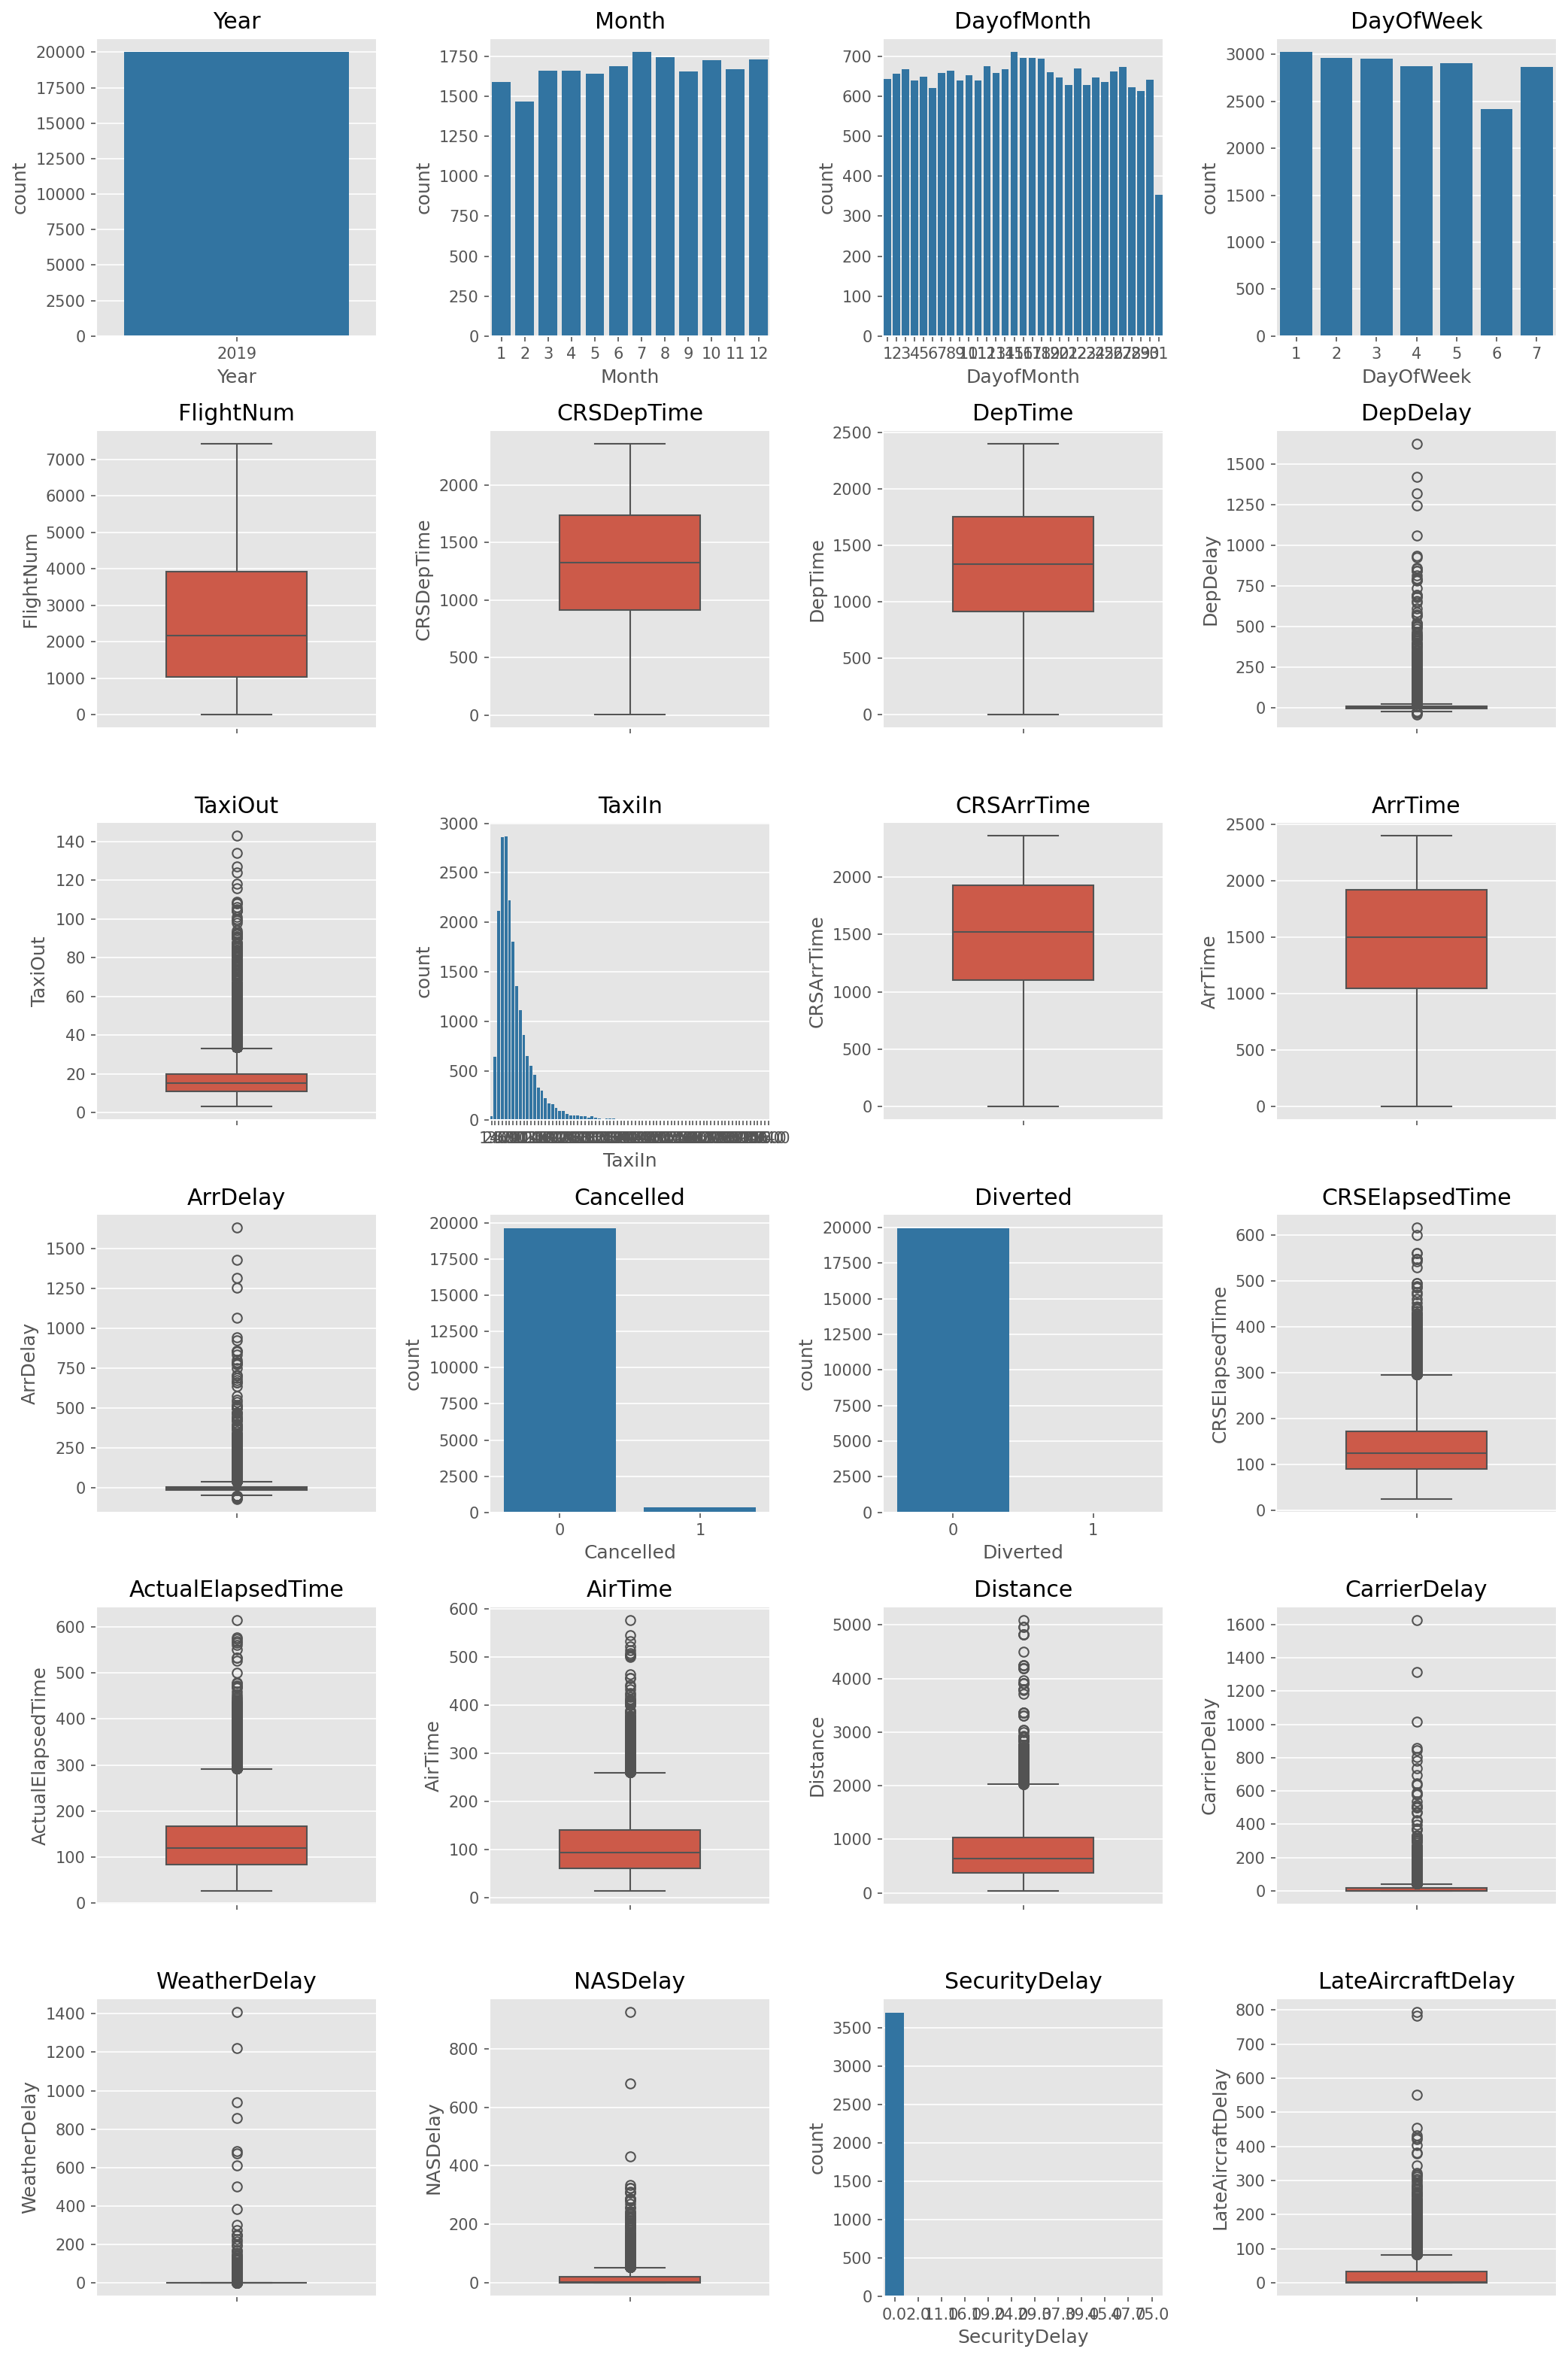

In [35]:
plt.rcParams.update(**{'figure.dpi':150})
plt.style.use('ggplot') # can skip this - plots are more visually appealing with this style

fig,axs = plt.subplots(6,4,figsize=(14,21))

for i,ind in enumerate(df_2019_info.index):
    # 2019 data

    # if the value type is continuous, we will use boxplot
    if df_2019_info.loc[ind, 'var_type'] == 'Continuous':
        sns.boxplot(df_2019,y=ind,ax=axs[i//4, i%4],width=0.5)
        
    # if the value type is discrete, we will use bar chart
    else:
        sns.countplot(data=df_2019,x=ind,color='#1f77b4',ax=axs[i//4, i%4])
    
    axs[i//4, i%4].set_title(ind)

    


fig.tight_layout()

In [36]:
df_2019_per_missing = (df_2019.isnull().sum()/df_2019.shape[0]).round(2)
df_2019_per_missing[df_2019_per_missing > 0]

DepTime              0.02
DepDelay             0.02
TaxiOut              0.02
TaxiIn               0.02
ArrTime              0.02
ArrDelay             0.02
CancellationCode     0.98
ActualElapsedTime    0.02
AirTime              0.02
CarrierDelay         0.81
WeatherDelay         0.81
NASDelay             0.81
SecurityDelay        0.81
LateAircraftDelay    0.81
dtype: float64

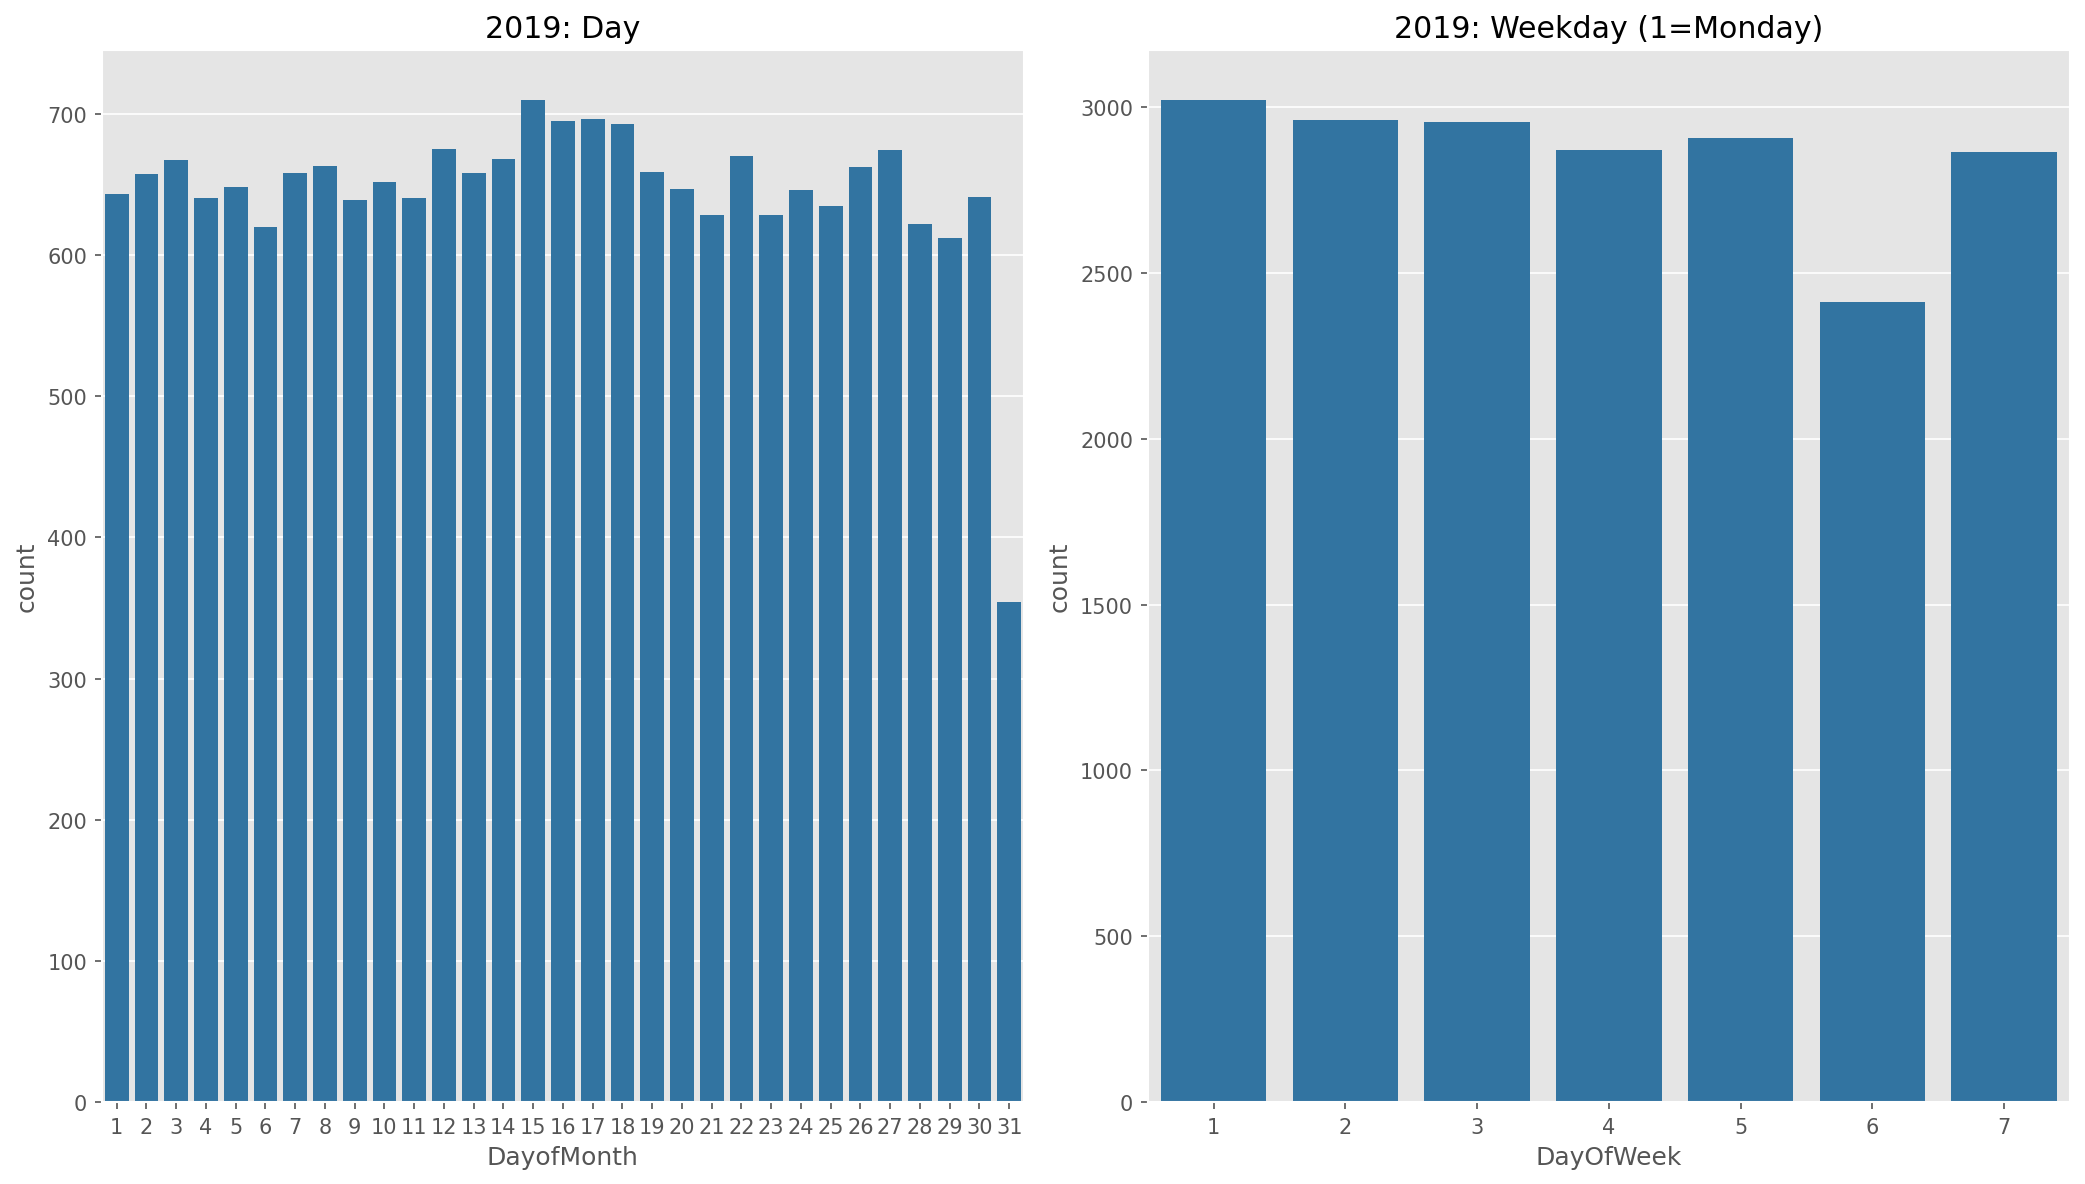

In [37]:
fig,axs = plt.subplots(1,2,figsize=(14,8))

columns = ['DayofMonth','DayOfWeek']

for i,column in enumerate(columns):
    # 2019 data

    _ = sns.countplot(data=df_2019,x=column,color='#1f77b4',ax=axs[i])
    # Alternatively (without seaborn)
    # _ = df_2019[column].value_counts().sort_index().plot(kind='bar',ax=axs[0,i])

    
_ = axs[0].set_title('2019: Day')
_ = axs[1].set_title('2019: Weekday (1=Monday)')

fig.tight_layout()

## Bivariate EDA 1: Departure Delay and Arrival Delay

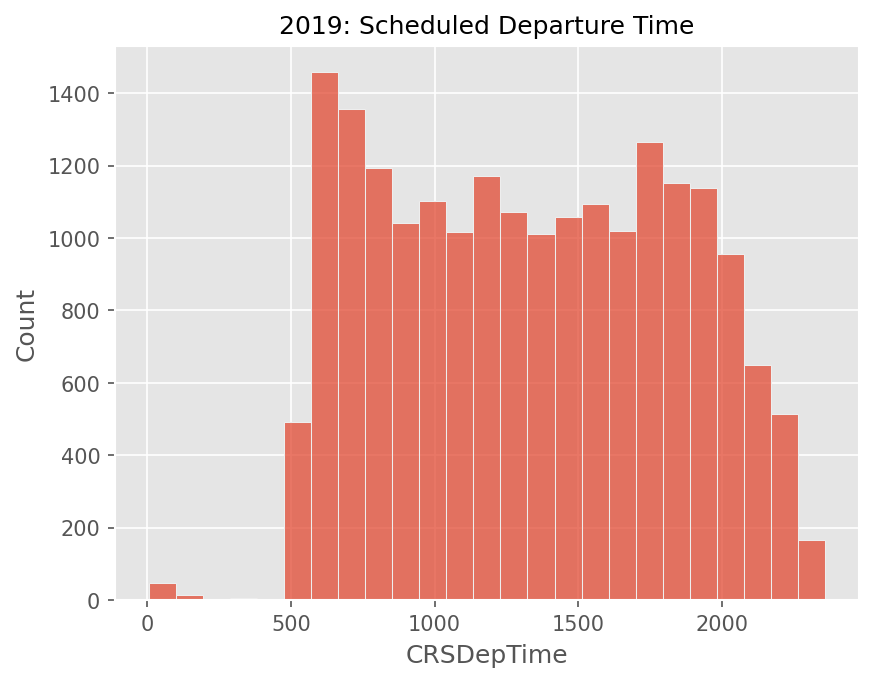

In [38]:
dt_plot = sns.histplot(df_2019,x='CRSDepTime',bins = 25)
dt_plot.set_title('2019: Scheduled Departure Time',fontsize=12)

fig.tight_layout()

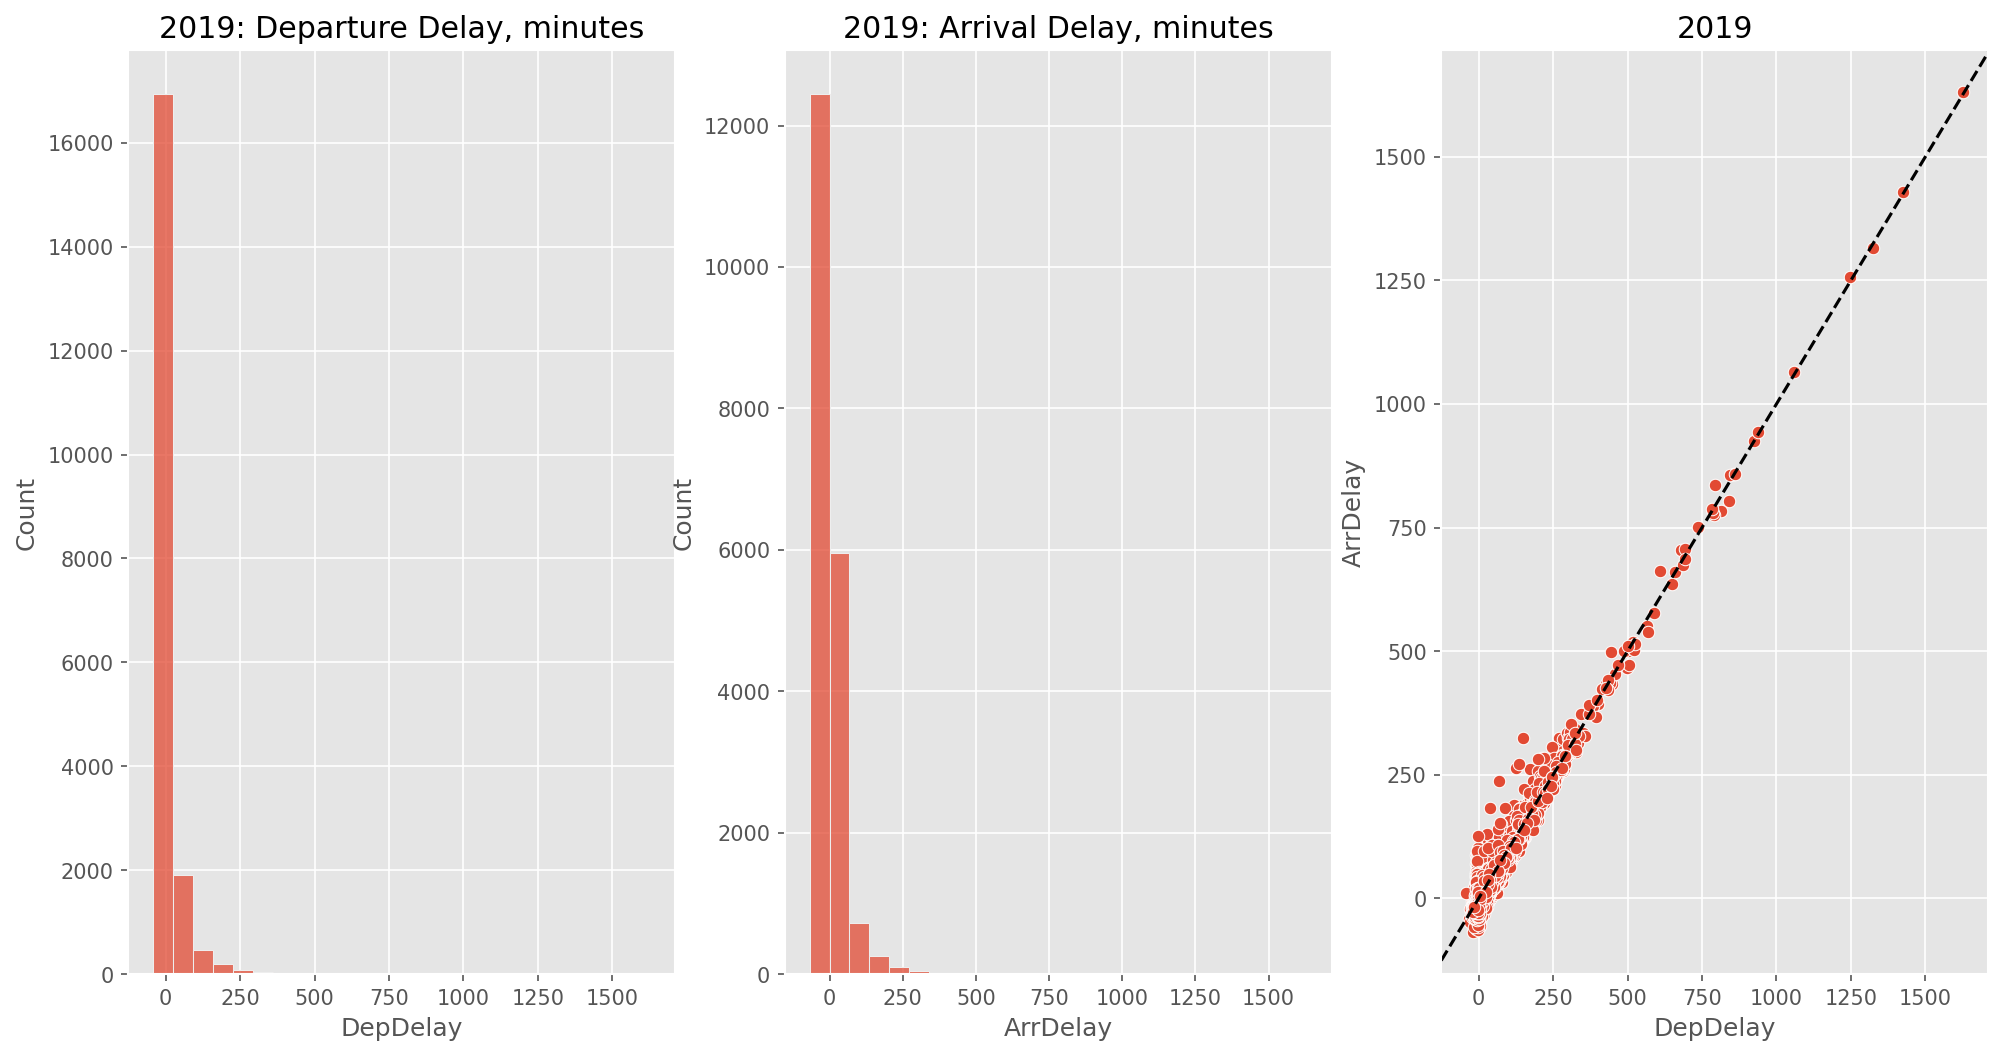

In [39]:
fig,axs = plt.subplots(1,3,figsize=(16,8))

### Histogram and Scatterplot of Depature Delay and Arrival Delay ###
_ = sns.histplot(df_2019,x='DepDelay',ax=axs[0],bins=25)
_ = axs[0].set_title('2019: Departure Delay, minutes')

_ = sns.histplot(df_2019,x='ArrDelay',ax=axs[1],bins = 25)
_ = axs[1].set_title('2019: Arrival Delay, minutes')

_ = sns.scatterplot(df_2019,x='DepDelay',y='ArrDelay',ax=axs[2])
_ = axs[2].axline((0, 0), slope=1,color='black',linestyle='dashed')
_ = axs[2].set_title('2019')

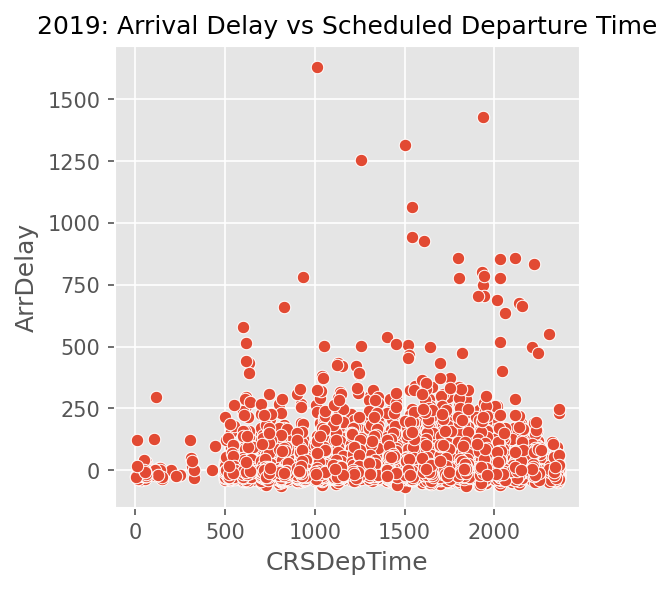

In [40]:
# plot of arrival delay vs departure time
fig,ax = plt.subplots(1,1,figsize=(4,4))

_ = sns.scatterplot(df_2019,x='CRSDepTime',y='ArrDelay',ax=ax)
_ = ax.set_title('2019: Arrival Delay vs Scheduled Departure Time',fontsize=12)

## Bivariate EDA 2: Distance and Airtimes

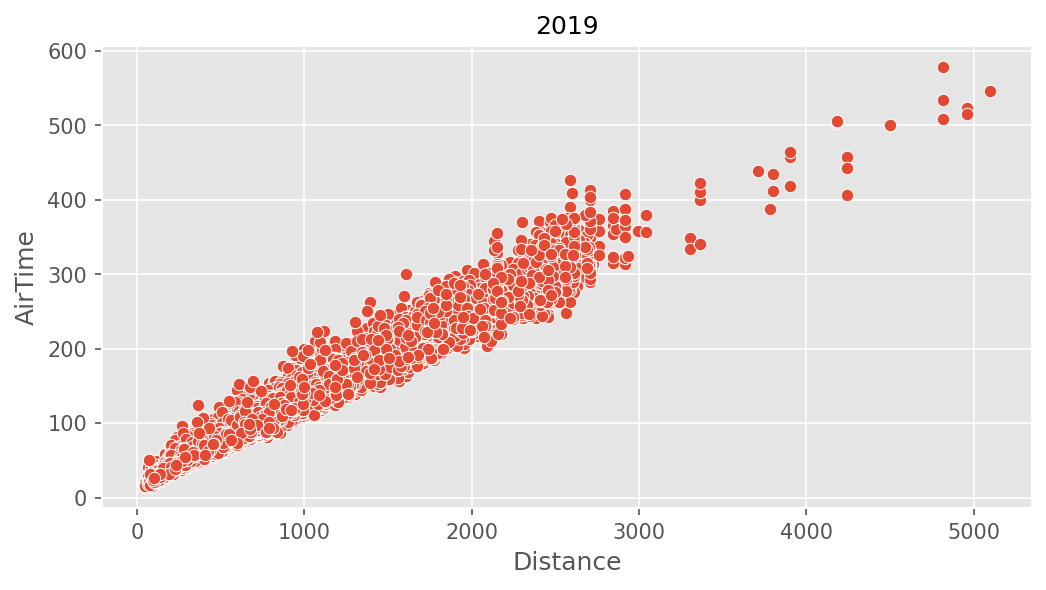

In [41]:
fig,axs = plt.subplots(1,1,figsize=(8,4))

_ = sns.scatterplot(df_2019,x='Distance',y='AirTime')
_ = axs.set_title('2019',fontsize=12)

In [42]:
# filter airtimes > 500
df_2019.query('AirTime > 500')

,Year,Month,DayofMonth,DayOfWeek,UniqueCarrier,TailNum,FlightNum,Origin,Dest,CRSDepTime,...,Diverted,CRSElapsedTime,ActualElapsedTime,AirTime,Distance,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
70547,2019,10,31,4,UA,N69063,362,HNL,EWR,1455,...,0,560.0,560.0,523.0,4962,NaN,NaN,NaN,NaN,NaN
22822,2019,6,24,1,UA,N211UA,202,ORD,OGG,1020,...,0,548.0,569.0,503.0,4184,0.0,0.0,25.0,0.0,0.0
14724,2019,7,7,7,UA,N66051,345,IAD,HNL,850,...,0,616.0,615.0,578.0,4817,NaN,NaN,NaN,NaN,NaN
73539,2019,7,21,7,UA,N646UA,344,HNL,IAD,1535,...,0,548.0,533.0,508.0,4817,NaN,NaN,NaN,NaN,NaN
75548,2019,6,28,5,HA,N382HA,90,HNL,BOS,1350,...,0,600.0,577.0,546.0,5095,NaN,NaN,NaN,NaN,NaN
64966,2019,5,11,6,UA,N673UA,344,HNL,IAD,1535,...,0,543.0,565.0,534.0,4817,NaN,NaN,NaN,NaN,NaN
38930,2019,12,10,2,UA,N76064,362,HNL,EWR,1550,...,0,560.0,574.0,515.0,4962,NaN,NaN,NaN,NaN,NaN
72684,2019,6,12,3,UA,N210UA,202,ORD,OGG,1020,...,0,548.0,532.0,504.0,4184,NaN,NaN,NaN,NaN,NaN
9770,2019,6,8,6,UA,N774UA,202,ORD,OGG,1020,...,0,548.0,550.0,506.0,4184,NaN,NaN,NaN,NaN,NaN


# Introduction to Seaborn Plotting Functions

## 1. sns.boxplot
```python
sns.boxplot(data=your_dataframe, x='categorical_column', y='numerical_column')
```
### Description:
Creates a box-and-whisker plot to display the distribution of a numerical variable across categories.
- **Use case:** Visualizing spread, outliers, and quartiles.
- **Key Parameters:**
  - `x` or `y`: Categorical and numerical variables.
  - `hue`: Optional grouping variable for color-coded subgroups.

---

## 2. sns.countplot
```python
sns.countplot(data=your_dataframe, x='categorical_column')
```
### Description:
Displays the count of observations for each category in a categorical variable.
- **Use case:** Summarizing the frequency distribution of categories.
- **Key Parameters:**
  - `x` or `y`: Categorical variable to count.
  - `hue`: Optional for additional grouping.

---

## 3. sns.histplot
```python
sns.histplot(data=your_dataframe, x='numerical_column', bins=30)
```
### Description:
Plots the distribution of a numerical variable as a histogram.
- **Use case:** Understanding the frequency distribution of numerical data.
- **Key Parameters:**
  - `x`: Numerical variable.
  - `bins`: Number of bins to divide the data.
  - `hue`: Color-code by another variable.

---

## 4. sns.scatterplot
```python
sns.scatterplot(data=your_dataframe, x='numerical_column1', y='numerical_column2')
```
### Description:
Generates a scatter plot to visualize the relationship between two numerical variables.
- **Use case:** Identifying correlations or trends.
- **Key Parameters:**
  - `x` and `y`: Numerical variables.
  - `hue`: Optional for color grouping.
  - `size`: Optional to vary point sizes by a variable.

---

## 5. sns.regplot
```python
sns.regplot(data=your_dataframe, x='numerical_column1', y='numerical_column2')
```
### Description:
Creates a scatter plot with a fitted regression line to visualize trends.
- **Use case:** Exploring linear relationships.
- **Key Parameters:**
  - `x` and `y`: Numerical variables.
  - `order`: Polynomial order of the regression.
  - `ci`: Confidence interval for the regression line.
 
# Pandas Tips and Tricks

## 1. **Using `df.query()`**
The `query()` method allows you to filter a DataFrame using a concise, SQL-like syntax.

```python
# Example: Filtering rows where column 'A' is greater than 10 and column 'B' equals 'value'
filtered_df = df.query("A > 10 and B == 'value'")
```

## 2. **Using `df['columnName'].replace()`**

```python
# Example: Replacing all occurrences of -1 with NaN in a column
df['columnName'] = df['columnName'].replace(-1, np.nan)
```
```python
# Replace multiple values at once
df['columnName] = df['columnName'].replace({-1: np.nan, 0: 'missing'})
```
## 3. **Iterating with `df.index`*
    
```python
# Example: Looping through the index of a DataFrame
for ind in df.index:
    print(f"Index: {ind}, Row data: {df.loc[ind]}")
```
## 4. **Using `enumerate(df.index)`**
```python
# Example: Printing row index and its corresponding row number
for i, ind in enumerate(df.index):
    print(f"Row {i}: Index {ind}, Data: {df.loc[ind]}")
```

## Lab Assignment
### 1. Feature Engineering
Operate the following feature transformation:
- categorical column for weekday: 1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thursday',5:'Friday',6:'Saturday',7:'Sunday'
- For `ArrDelay feature`, use ax(0,x) transform to get rid of negative values
- log transformation: create a new column using the log(1+x)
- Create a new feature: average speed (Distnace/Airtime)

### 2. EDA review
Replicate the process above, i.e.,

Generating descriptive statistics, such as mean, standard deviation, and percentiles.
Visualizing data using:
  - Boxplots for continuous variables.
  - Bar charts for discrete variables.
Calculating missing values, expressed as a percentage for each column.
Bivariate EDA for Departure Delay and Arrival Delay
Bivariate EDA for Distance and Airtime

for a subset of flights from ORD to SFO (you don't need to redo the feature engineering part)

In [43]:
## FEATURE ENGINEERING

# categorical column
weekday_map = {
    1: "Monday",
    2: "Tuesday",
    3: "Wednesday",
    4: "Thursday",
    5: "Friday",
    6: "Saturday",
    7: "Sunday"
}

df_2019["weekday"] = df_2019["DayOfWeek"].map(weekday_map)

df_2019["weekday"] = pd.Categorical(
    df_2019["weekday"],
    categories=[
        "Monday", "Tuesday", "Wednesday",
        "Thursday", "Friday", "Saturday", "Sunday"
    ],
    ordered=True
)

# transform negative values
df_2019["ArrDelay_nonneg"] = np.maximum(0, df_2019["ArrDelay"])

# log transformation
df_2019["ArrDelay_log"] = np.log1p(df_2019["ArrDelay_nonneg"])

# average speed
df_2019["avg_speed_mph"] = df_2019["Distance"] / (df_2019["AirTime"] / 60)


In [47]:
## EDA Review
ord_sfo = df_2019[(df_2019["Origin"] == "ORD") & (df_2019["Dest"] == "SFO")]

ord_sfo

,Year,Month,DayofMonth,DayOfWeek,UniqueCarrier,TailNum,FlightNum,Origin,Dest,CRSDepTime,...,Distance,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,weekday,ArrDelay_nonneg,ArrDelay_log,avg_speed_mph
74713,2019,8,4,7,UA,N78005,1742,ORD,SFO,1935,...,1846,NaN,NaN,NaN,NaN,NaN,Sunday,4.0,1.609438,457.685950
6845,2019,4,14,7,UA,N69833,1847,ORD,SFO,1546,...,1846,0.0,10.0,0.0,0.0,94.0,Sunday,104.0,4.653960,446.612903
18401,2019,12,12,4,AA,N337PJ,2639,ORD,SFO,1514,...,1846,0.0,0.0,11.0,0.0,99.0,Thursday,110.0,4.709530,405.714286
11898,2019,6,15,6,AS,N284VA,1201,ORD,SFO,635,...,1846,NaN,NaN,NaN,NaN,NaN,Saturday,0.0,0.000000,434.352941
66296,2019,11,30,6,AS,N320AS,221,ORD,SFO,730,...,1846,NaN,NaN,NaN,NaN,NaN,Saturday,8.0,2.197225,421.140684
10869,2019,9,9,1,UA,N77871,2166,ORD,SFO,600,...,1846,NaN,NaN,NaN,NaN,NaN,Monday,0.0,0.000000,446.612903
7034,2019,7,31,3,UA,N57857,222,ORD,SFO,1400,...,1846,NaN,NaN,NaN,NaN,NaN,Wednesday,0.0,0.000000,450.243902
4869,2019,9,9,1,UA,N78438,1891,ORD,SFO,1000,...,1846,NaN,NaN,NaN,NaN,NaN,Monday,11.0,2.484907,441.274900
64503,2019,10,28,1,UA,N14235,810,ORD,SFO,1305,...,1846,NaN,NaN,NaN,NaN,NaN,Monday,0.0,0.000000,439.523810
73452,2019,2,19,2,AA,N136AN,1470,ORD,SFO,1145,...,1846,NaN,NaN,NaN,NaN,NaN,Tuesday,0.0,0.000000,427.644788


In [45]:
ord_sfo_info = get_info(ord_sfo)
ord_sfo_info

,count,mean,std,min,25%,50%,75%,max,missing_percent,unique_val,var_type
Year,19.0,2019.000000,0.000000,2019.0,2019.000000,2019.000000,2019.000000,2019.000000,0.000000,1,Categorical
Month,19.0,7.526316,3.717353,1.0,5.000000,8.000000,11.000000,12.000000,0.000000,11,Categorical
DayofMonth,19.0,17.210526,8.841688,4.0,9.500000,15.000000,26.500000,31.000000,0.000000,15,Categorical
DayOfWeek,19.0,3.894737,2.258188,1.0,2.000000,4.000000,6.000000,7.000000,0.000000,7,Categorical
FlightNum,19.0,1469.210526,895.236318,221.0,691.000000,1470.000000,2028.500000,2798.000000,0.000000,16,Categorical
CRSDepTime,19.0,1320.894737,460.905015,600.0,1068.500000,1305.000000,1644.000000,2237.000000,0.000000,17,Categorical
DepTime,19.0,1351.105263,478.937933,556.0,1065.500000,1400.000000,1718.500000,2232.000000,0.000000,18,Categorical
DepDelay,19.0,19.684211,44.297044,-7.0,-2.500000,-1.000000,11.000000,125.000000,0.000000,15,Categorical
TaxiOut,19.0,22.473684,13.213497,10.0,13.500000,21.000000,26.000000,64.000000,0.000000,15,Categorical
TaxiIn,19.0,6.947368,3.519370,3.0,4.000000,6.000000,8.500000,15.000000,0.000000,9,Categorical


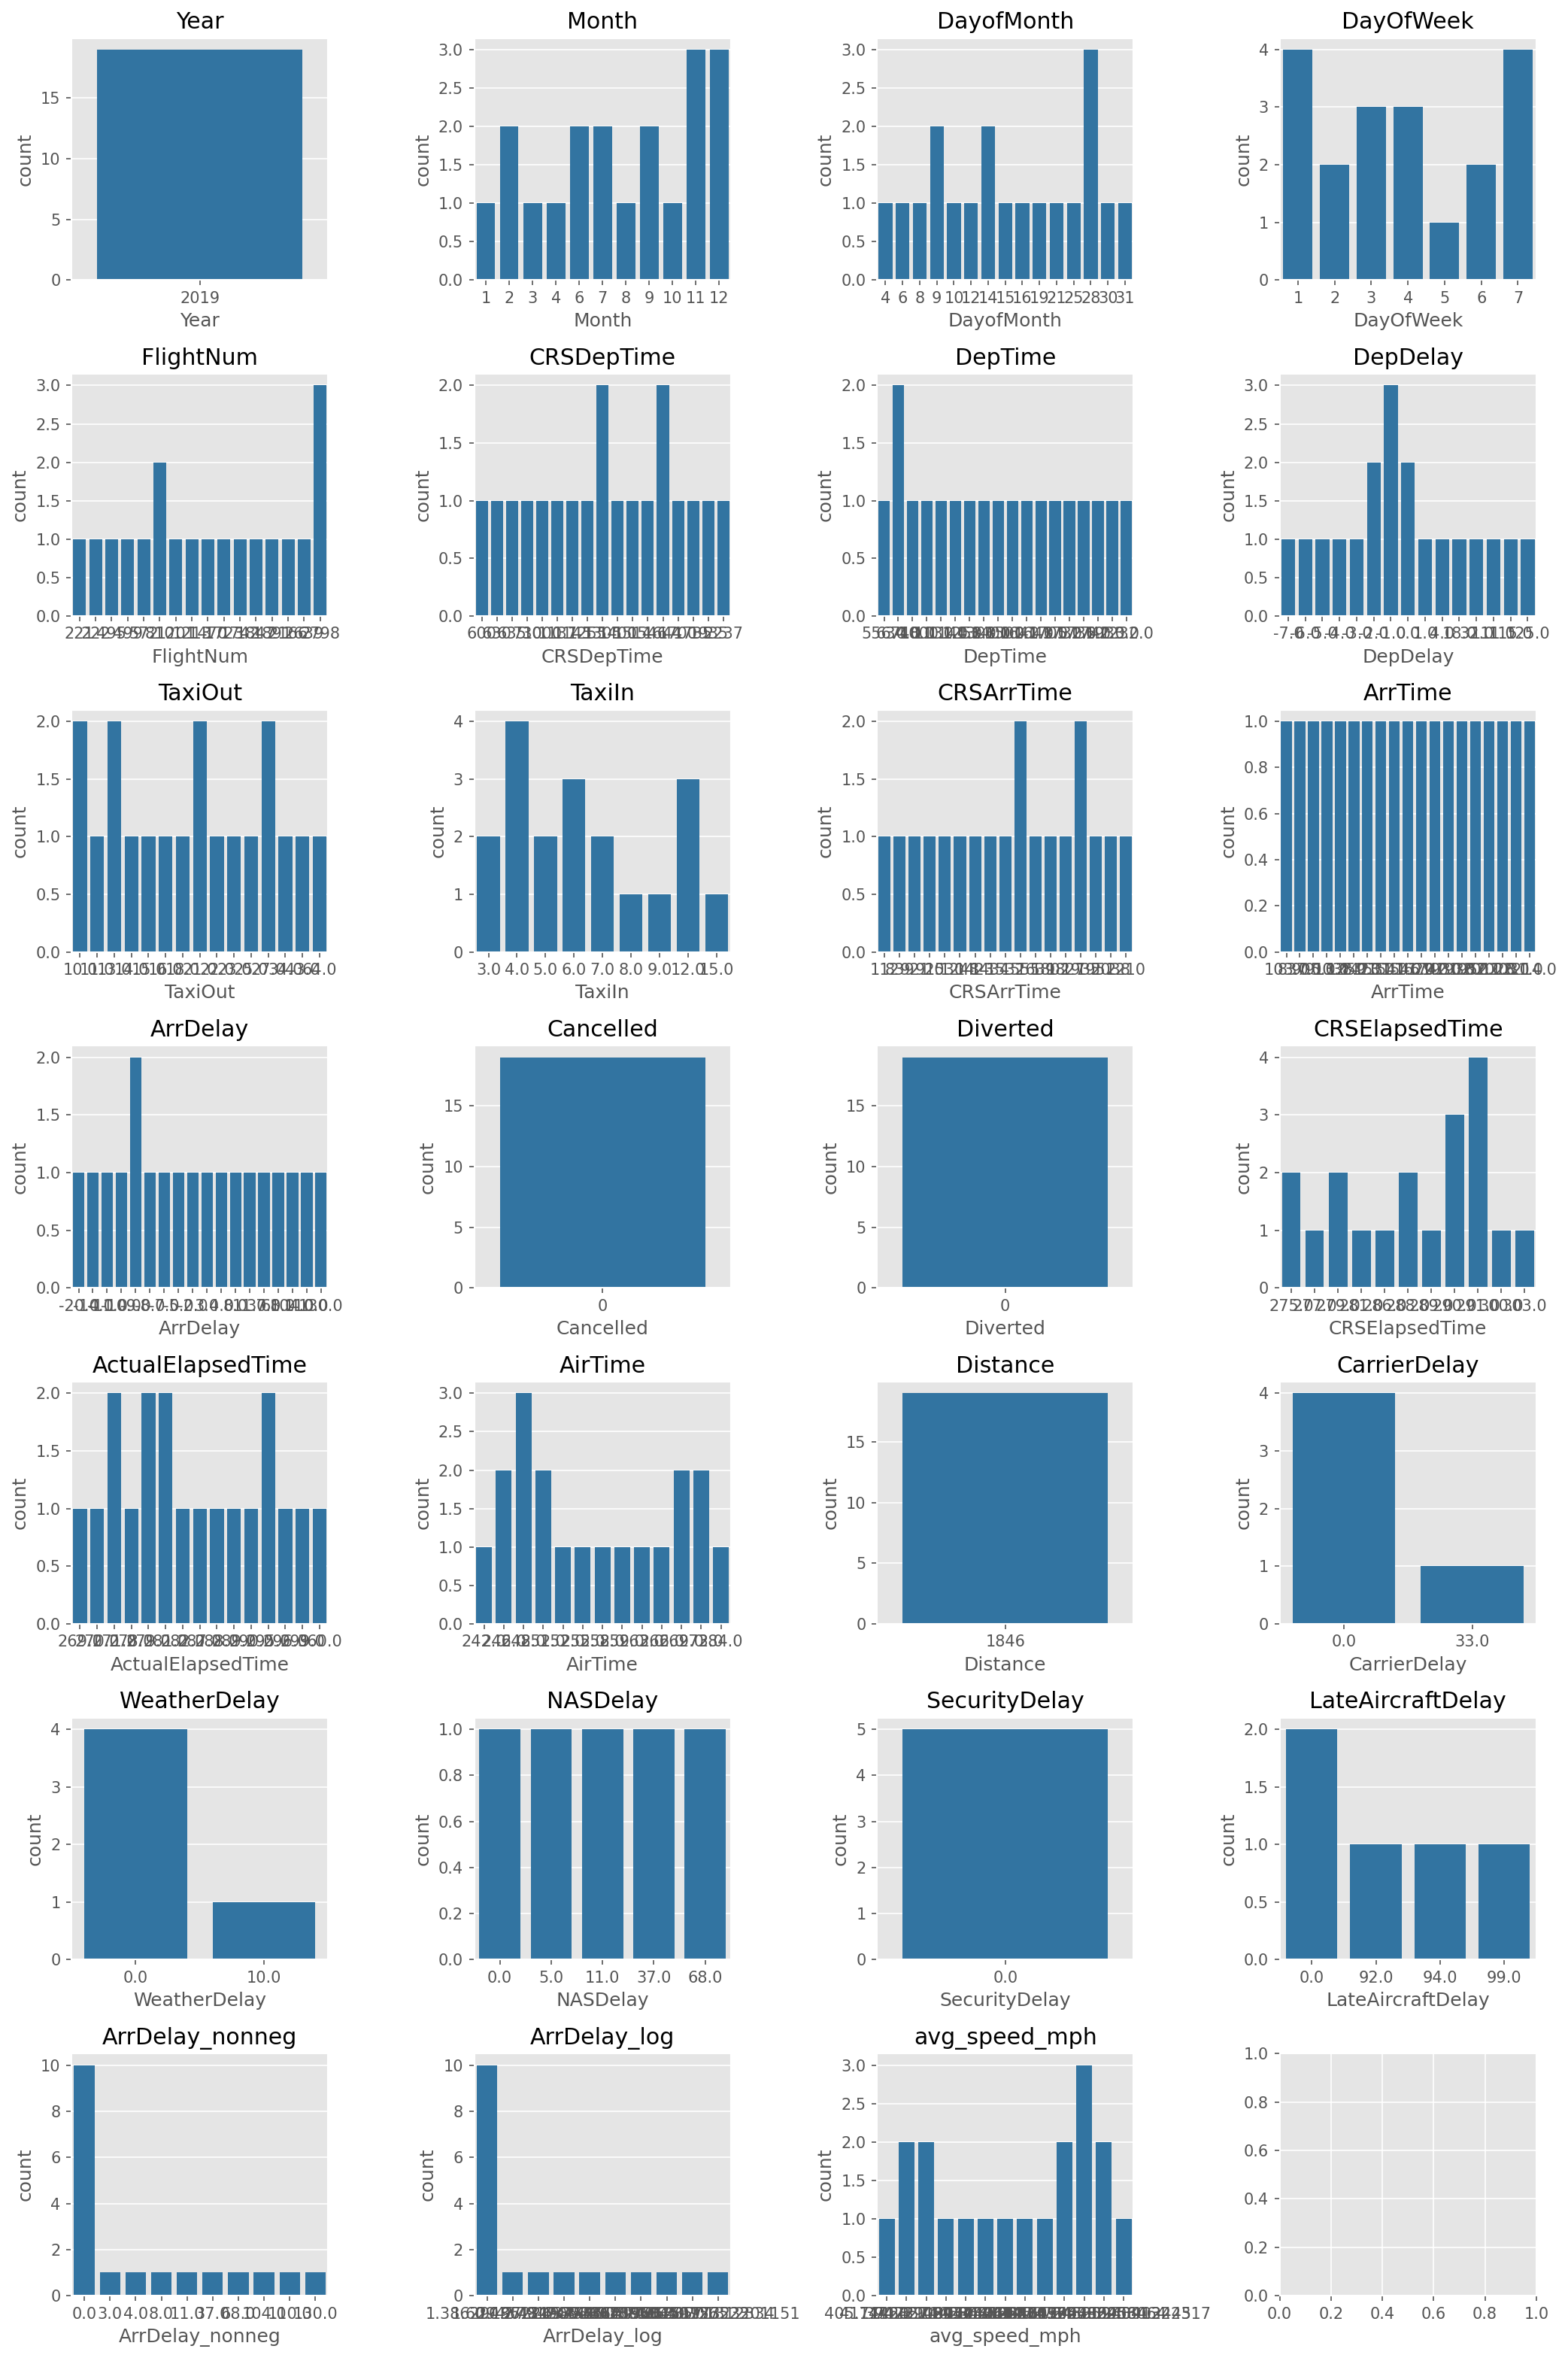

In [49]:
# box plots and bar charts
plt.rcParams.update(**{'figure.dpi':150})
plt.style.use('ggplot') # can skip this - plots are more visually appealing with this style

fig,axs = plt.subplots(7,4,figsize=(14,21))

for i,ind in enumerate(ord_sfo_info.index):
    # 2019 data

    # if the value type is continuous, we will use boxplot
    if ord_sfo_info.loc[ind, 'var_type'] == 'Continuous':
        sns.boxplot(ord_sfo,y=ind,ax=axs[i//4, i%4],width=0.5)
        
    # if the value type is discrete, we will use bar chart
    else:
        sns.countplot(data=ord_sfo,x=ind,color='#1f77b4',ax=axs[i//4, i%4])
    
    axs[i//4, i%4].set_title(ind)

    


fig.tight_layout()

In [48]:
# missing values
ord_sfo_per_missing = (ord_sfo.isnull().sum()/ord_sfo.shape[0]).round(2)
ord_sfo_per_missing[ord_sfo_per_missing > 0]

CancellationCode     1.00
CarrierDelay         0.74
WeatherDelay         0.74
NASDelay             0.74
SecurityDelay        0.74
LateAircraftDelay    0.74
dtype: float64

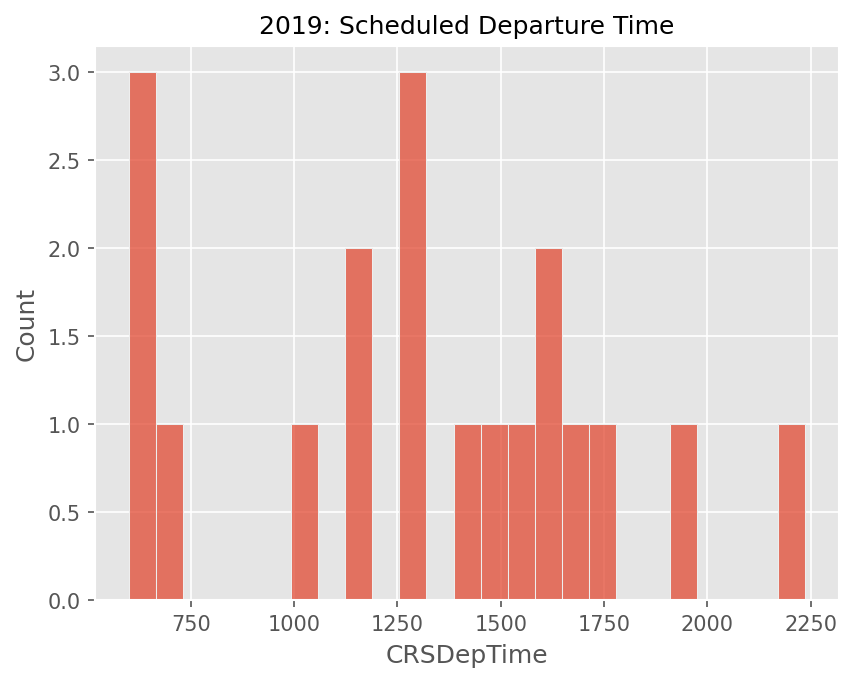

In [50]:
# bivariate eda
dt_plot = sns.histplot(ord_sfo,x='CRSDepTime',bins = 25)
dt_plot.set_title('2019: Scheduled Departure Time',fontsize=12)

fig.tight_layout()

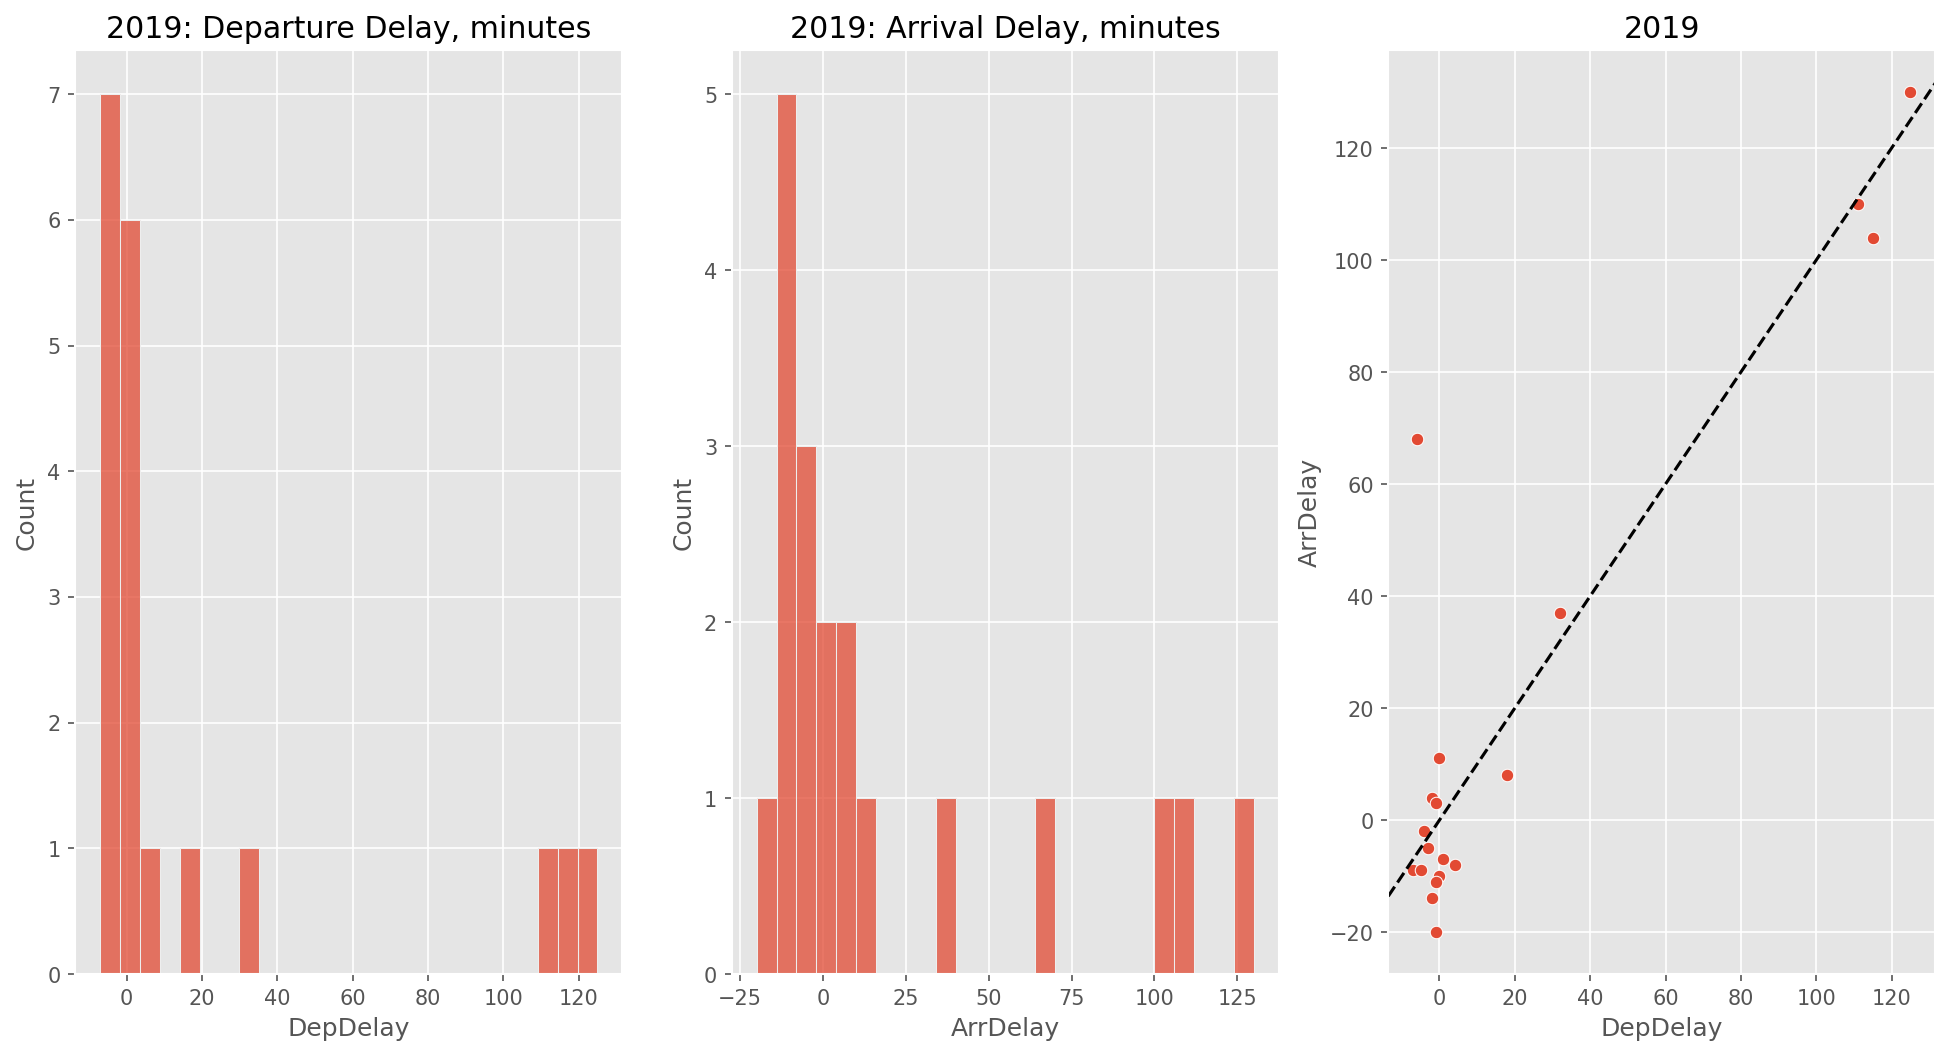

In [51]:
# departure delay and arrival delay
fig,axs = plt.subplots(1,3,figsize=(16,8))

### Histogram and Scatterplot of Depature Delay and Arrival Delay ###
_ = sns.histplot(ord_sfo,x='DepDelay',ax=axs[0],bins=25)
_ = axs[0].set_title('2019: Departure Delay, minutes')

_ = sns.histplot(ord_sfo,x='ArrDelay',ax=axs[1],bins = 25)
_ = axs[1].set_title('2019: Arrival Delay, minutes')

_ = sns.scatterplot(ord_sfo,x='DepDelay',y='ArrDelay',ax=axs[2])
_ = axs[2].axline((0, 0), slope=1,color='black',linestyle='dashed')
_ = axs[2].set_title('2019')

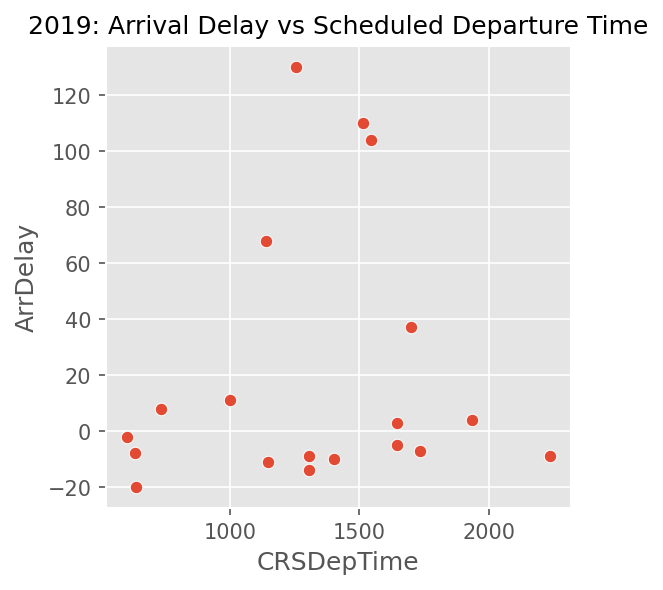

In [52]:
# plot of arrival delay vs departure time
fig,ax = plt.subplots(1,1,figsize=(4,4))

_ = sns.scatterplot(ord_sfo,x='CRSDepTime',y='ArrDelay',ax=ax)
_ = ax.set_title('2019: Arrival Delay vs Scheduled Departure Time',fontsize=12)

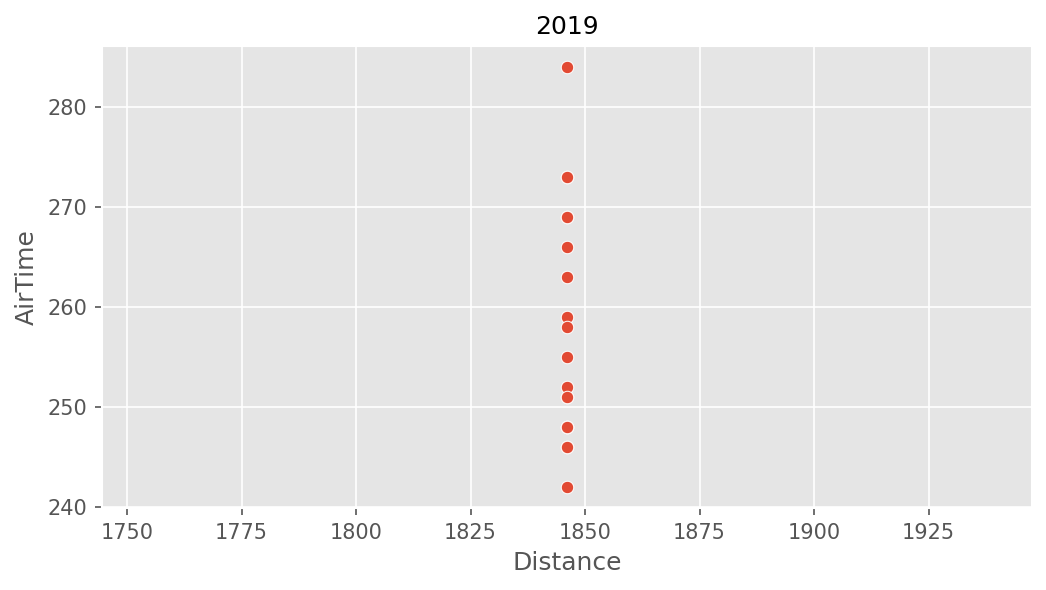

In [53]:
# distance and airtimes
fig,axs = plt.subplots(1,1,figsize=(8,4))

_ = sns.scatterplot(ord_sfo,x='Distance',y='AirTime')
_ = axs.set_title('2019',fontsize=12)